# **Part 2 - NHL Entry Draft**

---


**Phase 1 - Data Import**

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8,6]
sns.set()

SEED = 1

#import data and create X & y sets
df = pd.read_csv('Hockey.csv', encoding = "ISO-8859-1")

**Phase 2 - Data Preprocessing**

---



In [4]:
#create dummy variables for all categorical variables
#df_d = pd.get_dummies(df)
y = df.iloc[:,0]
X = df.iloc[:,2:]
X.shape

(559, 23)

In [5]:
#create correlation matrix for all 53 variables to see if there are obvious features that can be dropped
corr = df.corr()
corr.style.background_gradient()

,MakeNHL,P/G,RelPM,Import,Ht,TeamStr,TOI,2ndAss%,G:A,Overage?,Weight,AgeInMonths,TeamForwardPointRank,Top5Team,Top10Team,IPP,PercentTO,TotalQOC,TotalQOT,OIGwTop,TopPlayer,GFDifferential,PPGRelativeToLead,DraftYear
MakeNHL,1,0.352285,0.0894854,-0.00511142,-0.128892,0.102951,0.25949,-0.0299392,-0.0247175,-0.187012,-0.130482,-0.170868,-0.274892,0.0194551,0.00968661,0.218057,0.242405,-0.00277248,0.109892,0.158897,0.24377,0.101433,0.29649,0.0799426
P/G,0.352285,1,0.517817,0.0331338,-0.450613,0.128492,0.808563,0.00517721,0.00313797,0.190013,-0.382472,0.23228,-0.845889,0.112726,0.128503,0.569763,0.852019,0.160473,0.408971,0.598403,0.53204,0.563027,0.832763,0.148293
RelPM,0.0894854,0.517817,1,0.102738,-0.239681,0.0248436,0.452407,0.0496785,0.0347309,0.127998,-0.211793,0.15683,-0.53602,-0.0261162,-0.0639163,0.232369,0.612147,0.0232242,0.192981,0.414811,0.25991,0.938775,0.496744,0.0936167
Import,-0.00511142,0.0331338,0.102738,1,0.0321283,0.0252949,-0.0251942,0.0197753,0.0232327,0.0279307,-0.0489225,0.0785523,-0.0273846,-0.0797267,-0.0277809,0.0272138,-0.00153742,-0.00507265,0.0351566,0.0350267,0.0310758,0.0976703,0.00563692,-0.00351179
Ht,-0.128892,-0.450613,-0.239681,0.0321283,1,-0.170552,-0.349955,-0.0402576,-0.00922273,-0.00452113,0.61624,-0.0275053,0.424754,-0.0539212,-0.0799722,-0.302781,-0.408183,-0.105865,-0.183334,-0.172046,-0.224371,-0.227562,-0.381,-0.0660928
TeamStr,0.102951,0.128492,0.0248436,0.0252949,-0.170552,1,-0.135865,0.0784491,-0.0672523,0.0699403,-0.169495,0.103762,0.063636,0.32706,0.432392,0.0491066,-0.0896532,-0.066596,0.390247,-0.133871,-0.0748572,-0.0729635,-0.0267207,0.0325459
TOI,0.25949,0.808563,0.452407,-0.0251942,-0.349955,-0.135865,1,-0.0048419,0.0581778,0.159378,-0.29602,0.188338,-0.801327,-0.0219451,-0.0358593,0.381983,0.852039,0.131384,0.222983,0.561325,0.458192,0.479357,0.747001,0.0862888
2ndAss%,-0.0299392,0.00517721,0.0496785,0.0197753,-0.0402576,0.0784491,-0.0048419,1,-0.507874,-0.0426609,-0.0682417,-0.043413,0.00930106,-0.0468698,-0.0161396,0.0289603,-0.0229173,-0.0775443,-0.0188865,-0.00907221,-0.0602039,0.0411563,-0.00946972,0.0150052
G:A,-0.0247175,0.00313797,0.0347309,0.0232327,-0.00922273,-0.0672523,0.0581778,-0.507874,1,0.0634459,0.00508452,0.0519593,-0.0621045,-0.0339055,-0.0358168,-0.00933247,0.0415614,0.0654782,0.0225529,0.0501169,0.0239903,0.0388449,0.00953838,-0.0120096
Overage?,-0.187012,0.190013,0.127998,0.0279307,-0.00452113,0.0699403,0.159378,-0.0426609,0.0634459,1,-0.0149744,0.908733,-0.122976,0.0237684,0.0670218,0.0777283,0.172447,0.0875485,0.1315,0.190749,0.166887,0.120784,0.161811,-0.0397777


In [6]:
#rget rid of three extremely uncorrelated features
df = df.drop(['TotalQOC', 'Top10Team', 'Import'], axis=1)
y = df.iloc[:,0]
X = df.iloc[:,2:]
X.head()

,P/G,RelPM,Ht,TeamStr,TOI,2ndAss%,G:A,Overage?,Weight,AgeInMonths,TeamForwardPointRank,Top5Team,IPP,PercentTO,TotalQOT,OIGwTop,TopPlayer,GFDifferential,PPGRelativeToLead,DraftYear
0,1.828379,-0.009524,72,0.473333,0.450000,0.182692,0.557692,0,198,228,1.0,0,0.781818,0.302817,0.307920,1.122449,0,0.044135,1.0,2009
1,1.634882,0.095210,73,0.563636,0.523636,0.169811,0.452830,0,186,224,1.0,1,0.792208,0.393548,0.287225,1.000000,1,0.087621,1.0,2010
2,1.688586,0.065657,73,0.501792,0.418826,0.171429,0.552381,0,180,223,1.0,1,0.839286,0.335714,0.358487,1.000000,1,0.098990,1.0,2008
3,1.526397,-0.032070,74,0.562130,0.444037,0.160000,0.408000,0,198,216,1.0,0,0.810127,0.336842,0.286386,1.000000,1,-0.050427,1.0,1997
4,2.272272,0.138445,70,0.549451,0.513831,0.241379,0.427586,0,170,226,1.0,1,0.820513,0.426667,0.444617,1.000000,1,0.240265,1.0,2007


In [7]:
#validate the new correlation matrix to ensure relevancy of remaining features versus response 
corr = df.corr()
corr.style.background_gradient()

,MakeNHL,P/G,RelPM,Ht,TeamStr,TOI,2ndAss%,G:A,Overage?,Weight,AgeInMonths,TeamForwardPointRank,Top5Team,IPP,PercentTO,TotalQOT,OIGwTop,TopPlayer,GFDifferential,PPGRelativeToLead,DraftYear
MakeNHL,1,0.352285,0.0894854,-0.128892,0.102951,0.25949,-0.0299392,-0.0247175,-0.187012,-0.130482,-0.170868,-0.274892,0.0194551,0.218057,0.242405,0.109892,0.158897,0.24377,0.101433,0.29649,0.0799426
P/G,0.352285,1,0.517817,-0.450613,0.128492,0.808563,0.00517721,0.00313797,0.190013,-0.382472,0.23228,-0.845889,0.112726,0.569763,0.852019,0.408971,0.598403,0.53204,0.563027,0.832763,0.148293
RelPM,0.0894854,0.517817,1,-0.239681,0.0248436,0.452407,0.0496785,0.0347309,0.127998,-0.211793,0.15683,-0.53602,-0.0261162,0.232369,0.612147,0.192981,0.414811,0.25991,0.938775,0.496744,0.0936167
Ht,-0.128892,-0.450613,-0.239681,1,-0.170552,-0.349955,-0.0402576,-0.00922273,-0.00452113,0.61624,-0.0275053,0.424754,-0.0539212,-0.302781,-0.408183,-0.183334,-0.172046,-0.224371,-0.227562,-0.381,-0.0660928
TeamStr,0.102951,0.128492,0.0248436,-0.170552,1,-0.135865,0.0784491,-0.0672523,0.0699403,-0.169495,0.103762,0.063636,0.32706,0.0491066,-0.0896532,0.390247,-0.133871,-0.0748572,-0.0729635,-0.0267207,0.0325459
TOI,0.25949,0.808563,0.452407,-0.349955,-0.135865,1,-0.0048419,0.0581778,0.159378,-0.29602,0.188338,-0.801327,-0.0219451,0.381983,0.852039,0.222983,0.561325,0.458192,0.479357,0.747001,0.0862888
2ndAss%,-0.0299392,0.00517721,0.0496785,-0.0402576,0.0784491,-0.0048419,1,-0.507874,-0.0426609,-0.0682417,-0.043413,0.00930106,-0.0468698,0.0289603,-0.0229173,-0.0188865,-0.00907221,-0.0602039,0.0411563,-0.00946972,0.0150052
G:A,-0.0247175,0.00313797,0.0347309,-0.00922273,-0.0672523,0.0581778,-0.507874,1,0.0634459,0.00508452,0.0519593,-0.0621045,-0.0339055,-0.00933247,0.0415614,0.0225529,0.0501169,0.0239903,0.0388449,0.00953838,-0.0120096
Overage?,-0.187012,0.190013,0.127998,-0.00452113,0.0699403,0.159378,-0.0426609,0.0634459,1,-0.0149744,0.908733,-0.122976,0.0237684,0.0777283,0.172447,0.1315,0.190749,0.166887,0.120784,0.161811,-0.0397777
Weight,-0.130482,-0.382472,-0.211793,0.61624,-0.169495,-0.29602,-0.0682417,0.00508452,-0.0149744,1,-0.0216275,0.357189,-0.0384295,-0.31389,-0.342848,-0.17088,-0.129242,-0.20282,-0.211034,-0.324642,-0.0139763


In [8]:
#split data into 85% train, 15% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=SEED)

from sklearn.preprocessing import StandardScaler

#instantiate a scalar
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)
X_train_scale

# Now apply the transformations to the data:
X_train_all = scaler.transform(X)
X_train_all

C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  del sys.path[0]
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


array([[ 2.62588202, -0.40356578, -0.60001828, ...,  0.17658681,
         1.38389658,  1.27049231],
       [ 2.12761113,  0.85811015, -0.08087678, ...,  0.66160792,
         1.38389658,  1.51996888],
       [ 2.26590436,  0.50209424, -0.08087678, ...,  0.78840763,
         1.38389658,  1.02101573],
       ...,
       [ 1.45293606,  0.72622534, -2.15744276, ...,  0.53109893,
         1.38389658, -0.97479691],
       [-1.12681974,  2.31691227,  1.47654771, ...,  1.44427704,
        -0.95995493, -1.22427349],
       [ 1.95756229,  1.49756557, -1.11915977, ...,  1.97716367,
         0.80089765, -1.72322664]])

In [9]:
#create function to visualize confusion matrix
# from: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [10]:
print(__doc__)

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring="f1")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Automatically created module for IPython interactive environment


**Phase 3 - Classification Tree**

---



In [47]:
#CART ----------------------------------------------------------------------------------------------------
from sklearn.tree import DecisionTreeClassifier
#set class weights
weights = np.linspace(0.25, 0.25, 1)
classes = [{0: x, 1: 1.0-x} for x in weights]

#define the grid of hyperparameters
params_dt = {'class_weight': classes,'max_depth': [2,3,4,5], 'min_samples_leaf':[0.075], 'max_features':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], 'criterion':['entropy']}

#instantiate Decision Tree
dt = DecisionTreeClassifier(random_state=SEED)

#instantiate a 10-fold CV grid search object
grid_dt = GridSearchCV(estimator=dt, param_grid=params_dt, scoring='f1', cv=5, n_jobs=-1)

#Fit grid_dt to the training data
grid_dt.fit(X_train, y_train)

#extract the best params from 'grid_dt'
best_hyperparams = grid_dt.best_params_
print(best_hyperparams)

#extract best CV score 
best_CV_score = grid_dt.best_score_
print(best_CV_score)

#extract best model from grid_dt
best_model = grid_dt.best_estimator_

#refit the best model to all training data
best = best_model.fit(X_train,y_train)

#make predictions on test data
y_pred = best.predict(X_test)

{'class_weight': {0: 0.25, 1: 0.75}, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 0.6, 'min_samples_leaf': 0.075}
0.5224249654809926


C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [48]:
#create confusion & classification matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred,digits=3))

[[66  3]
 [ 8  7]]
              precision    recall  f1-score   support

           0      0.892     0.957     0.923        69
           1      0.700     0.467     0.560        15

   micro avg      0.869     0.869     0.869        84
   macro avg      0.796     0.712     0.742        84
weighted avg      0.858     0.869     0.858        84



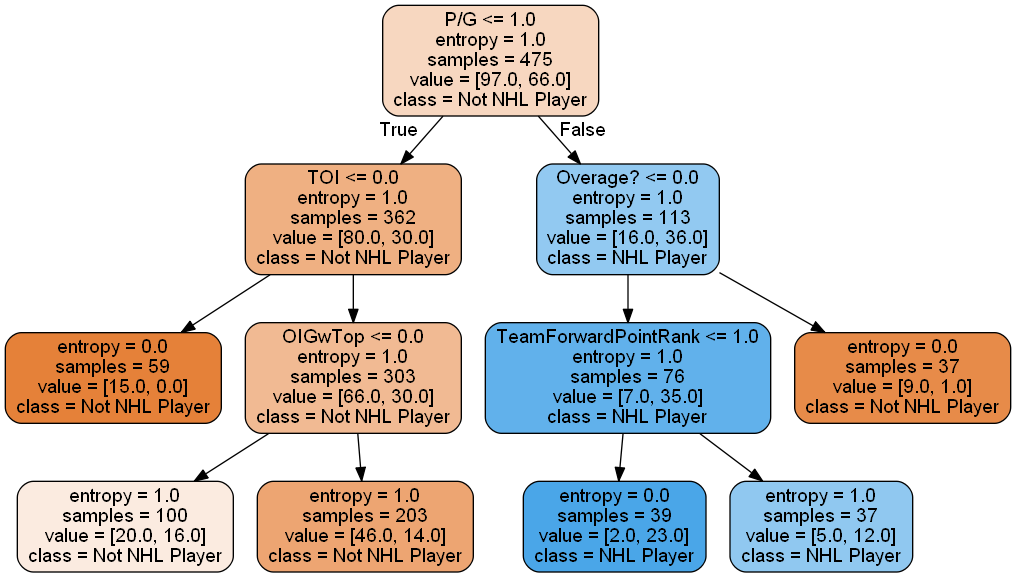

In [49]:
#generate and visually display optimal decision tree
from sklearn import tree
tree.export_graphviz(best, out_file='tree.dot', feature_names = X.columns, class_names = ["Not NHL Player", "NHL Player"],rounded = True, proportion = False, precision = 0, filled = True)
!dot -Tpng tree.dot -o tree.png
from IPython.display import Image
Image(filename = 'tree.png')

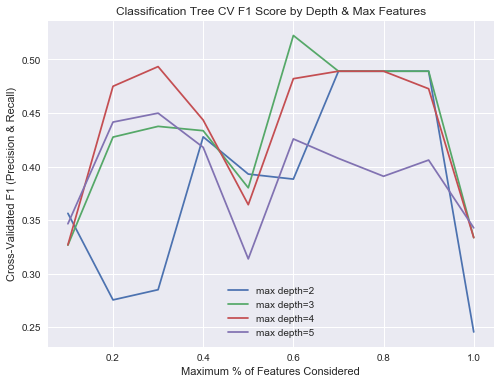

In [50]:
# plot the GridSearchCV results showing max tree depth versus % of features considered
xp = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
plt.plot(xp, list(grid_dt.cv_results_['mean_test_score'][:10]), label="max depth=2")
plt.plot(xp, list(grid_dt.cv_results_['mean_test_score'][10:20]), label="max depth=3")
plt.plot(xp, list(grid_dt.cv_results_['mean_test_score'][20:30]), label="max depth=4")
plt.plot(xp, list(grid_dt.cv_results_['mean_test_score'][30:]), label="max depth=5")
plt.title('Classification Tree CV F1 Score by Depth & Max Features')
plt.xlabel('Maximum % of Features Considered')
plt.ylabel('Cross-Validated F1 (Precision & Recall)')
plt.legend()

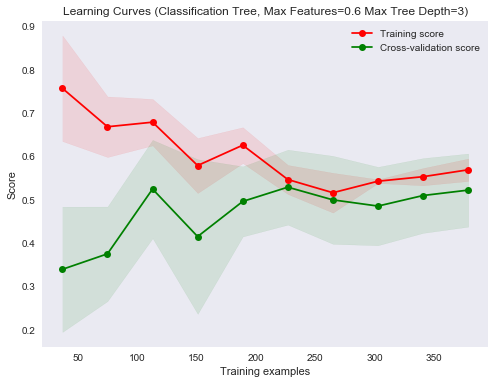

In [52]:
#plot the learning curve for the optimal Classification Tree model
title = "Learning Curves (Classification Tree, Max Features=0.6 Max Tree Depth=3)"
plot_learning_curve(best_model, title, X_train_scale, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, n_jobs=-1)
plt.show()

**Phase 4 - AdaBoost Tree Boosting **

---



In [57]:
#AdaBoost--------------------------------------------------------------------------------------------
from sklearn.ensemble import AdaBoostClassifier

#instantiate a base classification tree 'dtb'
dtb = DecisionTreeClassifier(random_state=SEED)

#define the grid of hyperparameters
#set class weights
weights = np.linspace(0.3, 0.3, 1)
classes = [{0: x, 1: 1.0-x} for x in weights]
params_ada = {'base_estimator__max_depth': [1], 'n_estimators':[10,100,250,500,1000,2000,3000,4000], 'learning_rate':[0.1,0.01,0.001],'base_estimator__criterion':['gini'], 'base_estimator__class_weight': classes}

#instantiate an adaboost classifier
adb_clf = AdaBoostClassifier(base_estimator=dtb, random_state=SEED)
adb_clf.get_params()

#instantiate a 10-fold CV grid search object
grid_ada = GridSearchCV(estimator=adb_clf, param_grid=params_ada, scoring='f1', cv=5, n_jobs=-1, verbose=3)
grid_ada.get_params()

#Fit grid_ada to the training data
grid_ada.fit(X_train_scale, y_train)

#extract the best params from 'grid_ada'
best_hyperparams = grid_ada.best_params_
print(best_hyperparams)

#extract best CV score 
best_CV_score = grid_ada.best_score_
print(best_CV_score)

#extract best model from grid_ada
best_ada = grid_ada.best_estimator_

#refit the best model to all training data
best = best_ada.fit(X_train_scale,y_train)

#make predictions on test data
y_pred = best.predict(X_test_scale)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  2.6min finished
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'base_estimator__class_weight': {0: 0.3, 1: 0.7}, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 1, 'learning_rate': 0.01, 'n_estimators': 1000}
0.5280639430083904


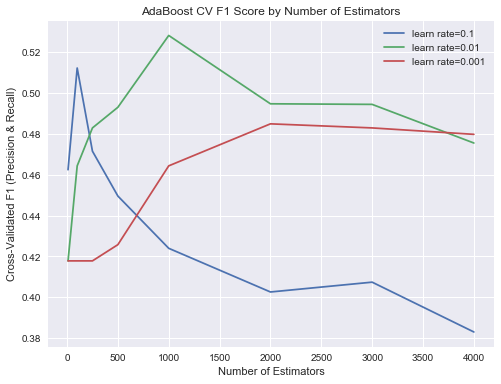

In [176]:
# plot the results showing learning rate versus number of base estimators
xp = [10,100,250,500,1000,2000,3000,4000]
plt.plot(xp, list(grid_ada.cv_results_['mean_test_score'][:8]), label="learn rate=0.1")
plt.plot(xp, list(grid_ada.cv_results_['mean_test_score'][8:16]), label="learn rate=0.01")
plt.plot(xp, list(grid_ada.cv_results_['mean_test_score'][16:]), label="learn rate=0.001")
plt.title('AdaBoost CV F1 Score by Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Cross-Validated F1 (Precision & Recall)')
plt.legend()

Confusion matrix, without normalization
[[65  4]
 [ 8  7]]


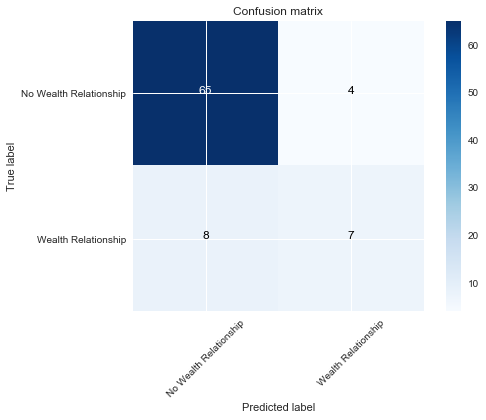

In [59]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["No Wealth Relationship", "Wealth Relationship"],
                      title='Confusion matrix')

In [62]:
#create confusion & classification matrix
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred,digits=3))

0.8571428571428571
[[65  4]
 [ 8  7]]
              precision    recall  f1-score   support

           0      0.890     0.942     0.915        69
           1      0.636     0.467     0.538        15

   micro avg      0.857     0.857     0.857        84
   macro avg      0.763     0.704     0.727        84
weighted avg      0.845     0.857     0.848        84



In [61]:
#display the most important features of the AdaBoost
best.feature_importances_
both = zip(list(best.feature_importances_),X.columns)
ndf = pd.DataFrame(list(both), columns=['Importance', 'Feature'])
ndf.sort_values('Importance',ascending=False,inplace=True)
ndf

,Importance,Feature
0,0.176,P/G
5,0.118,2ndAss%
9,0.111,AgeInMonths
18,0.099,PPGRelativeToLead
15,0.078,OIGwTop
14,0.071,TotalQOT
7,0.068,Overage?
1,0.052,RelPM
13,0.045,PercentTO
4,0.040,TOI


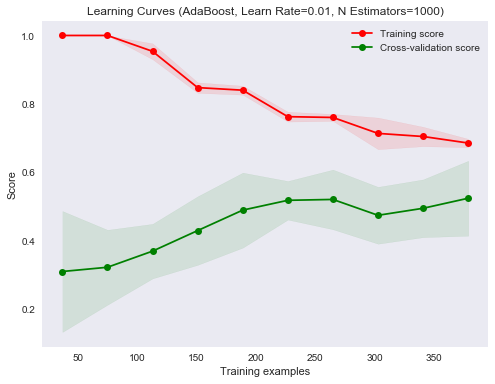

In [177]:
#plot the learning curve for AdaBoost
title = "Learning Curves (AdaBoost, Learn Rate=0.01, N Estimators=1000)"
plot_learning_curve(best_ada, title, X_train_scale, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, n_jobs=-1)
plt.show()

**Phase 5 - XGBoost Tree Boosting**

---



In [73]:
#XGBoost -------------------------------------------------------------------------------------------------
from xgboost import XGBClassifier

# fit model no training data
xgb = XGBClassifier(objective='binary:logistic',
                    silent=True)

#set parmeter grid
params = {
        'min_child_weight': [6],
        'n_estimators':[10,50,100,500,1250,2000,2750,3500],
        'learning_rate' : [1,0.5,0.05],
        'gamma': [15],
        'subsample': [0.6],
        'colsample_bytree': [0.6],
        'max_depth': [1,2],
        'scale_pos_weight': [2.1]
        }

#create GridSearchCV object and fit it versus training data
grid = GridSearchCV(estimator=xgb, param_grid=params, scoring='f1', n_jobs=-1, cv=5, verbose=3 )
grid.fit(X_train_scale, y_train)

#extract the best params from 'grid'
best_hyperparams = grid.best_params_
print(best_hyperparams)

#extract best CV score 
best_CV_score = grid.best_score_
print(best_CV_score)

#extract best model from grid
best_xg = grid.best_estimator_

#Fit the model to the data
best = best_xg.fit(X_train_scale,y_train)

#make predictions on test data
y_pred = best.predict(X_test_scale)
predictions = [round(value) for value in y_pred]

#create confusion & classification matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions,digits=3))

#extract the most imporatant features for xgboost
best.feature_importances_
both = zip(list(best.feature_importances_),X.columns)
ndf = pd.DataFrame(list(both), columns=['Importance', 'Feature'])
ndf.sort_values('Importance',ascending=False,inplace=True)
print(ndf)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 233 out of 240 | elapsed:   31.8s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   34.4s finished
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'colsample_bytree': 0.6, 'gamma': 15, 'learning_rate': 0.5, 'max_depth': 1, 'min_child_weight': 6, 'n_estimators': 2000, 'scale_pos_weight': 2.1, 'subsample': 0.6}
0.5360518146808262
[[66  3]
 [ 6  9]]
              precision    recall  f1-score   support

           0      0.917     0.957     0.936        69
           1      0.750     0.600     0.667        15

   micro avg      0.893     0.893     0.893        84
   macro avg      0.833     0.778     0.801        84
weighted avg      0.887     0.893     0.888        84

    Importance               Feature
5     0.151515               2ndAss%
0     0.121212                   P/G
18    0.121212     PPGRelativeToLead
1     0.121212                 RelPM
6     0.090909                   G:A
9     0.090909           AgeInMonths
15    0.060606               OIGwTop
14    0.060606              TotalQOT
3     0.030303               TeamStr
4     0.030303                   TOI
17    0.030303        GFDifferential
8     0.030303            

In [71]:
#function to lighten line colours on a matplotlib plot
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

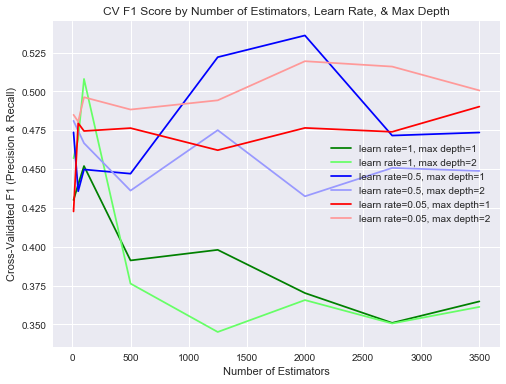

In [74]:
# plot the results showing cross-validated F1 scores by number of estimators, max base estimator depth, and learning rate
xi = [10,50,100,500,1250,2000,2750,3500]
plt.plot(xi, list(grid.cv_results_['mean_test_score'][:8]), label="learn rate=1, max depth=1", color='g')
plt.plot(xi, list(grid.cv_results_['mean_test_score'][8:16]), label="learn rate=1, max depth=2",color=lighten_color('g', 0.4))
plt.plot(xi, list(grid.cv_results_['mean_test_score'][16:24]), label="learn rate=0.5, max depth=1", color='b')
plt.plot(xi, list(grid.cv_results_['mean_test_score'][24:32]), label="learn rate=0.5, max depth=2",color=lighten_color('b', 0.4))
plt.plot(xi, list(grid.cv_results_['mean_test_score'][32:40]), label="learn rate=0.05, max depth=1", color='r')
plt.plot(xi, list(grid.cv_results_['mean_test_score'][40:]), label="learn rate=0.05, max depth=2",color=lighten_color('r', 0.4))
plt.title('CV F1 Score by Number of Estimators, Learn Rate, & Max Depth')
plt.xlabel('Number of Estimators')
plt.ylabel('Cross-Validated F1 (Precision & Recall)')
plt.legend()

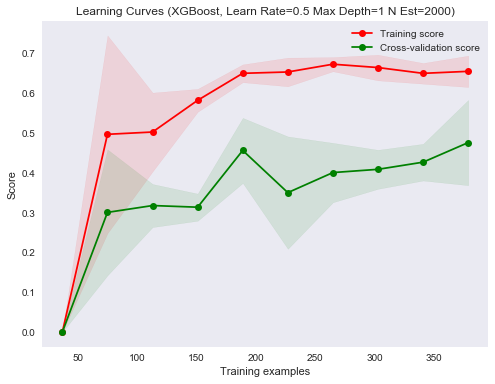

In [76]:
#plot the learning curve for XGBoost
title = "Learning Curves (XGBoost, Learn Rate=0.5 Max Depth=1 N Est=2000)"
plot_learning_curve(best_xg, title, X_train_scale, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, n_jobs=-1)
plt.show()

Confusion matrix, without normalization
[[66  3]
 [ 6  9]]


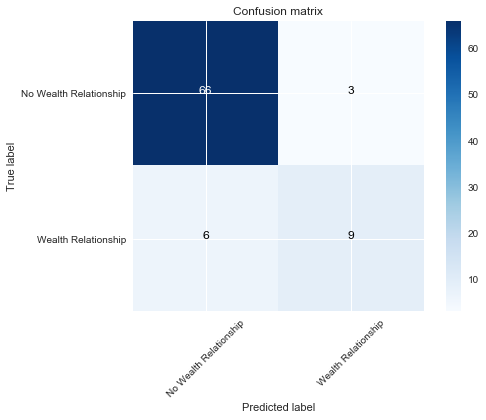

In [77]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["No Wealth Relationship", "Wealth Relationship"],
                      title='Confusion matrix')

In [78]:
#make predictions on all data
predall = best.predict(X_train_all)

#create confusion & classification matrix for test data
print(confusion_matrix(y,predall))
print(classification_report(y,predall, digits=3))

[[423  33]
 [ 29  74]]
              precision    recall  f1-score   support

           0      0.936     0.928     0.932       456
           1      0.692     0.718     0.705       103

   micro avg      0.889     0.889     0.889       559
   macro avg      0.814     0.823     0.818       559
weighted avg      0.891     0.889     0.890       559



In [79]:
predprob = best.predict_proba(X_train_all)
predprob

array([[0.35, 0.65],
       [0.19, 0.81],
       [0.21, 0.79],
       ...,
       [0.77, 0.23],
       [0.98, 0.02],
       [0.93, 0.07]], dtype=float32)

**Phase 6 - Instance-Based K-Nearest Neighbors**

---



In [80]:
#KNN--------------------------------------------------------------------------------------------------
from sklearn.neighbors import KNeighborsClassifier

# define the parameter values that should be searched
k_range = list(range(1, 30,1))
weight_options = ['distance', 'uniform']

# create a parameter grid: 
param_grid = dict(weights=weight_options, n_neighbors=k_range)

# instantiate and fit the gridsearch
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=3)
grid_knn.fit(X_train_scale, y_train)

#extract the best params from 'grid_knn'
best_hyperparams = grid_knn.best_params_
print(best_hyperparams)

#extract best CV score 
best_CV_score = grid_knn.best_score_
print(best_CV_score)

#extract best model from grid_knn
best_knn = grid_knn.best_estimator_

#refit the best model to all training data
best = best_knn.fit(X_train_scale,y_train)

#predict test set labels
y_pred = best.predict(X_test_scale)

Fitting 5 folds for each of 58 candidates, totalling 290 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.7s


{'n_neighbors': 10, 'weights': 'distance'}
0.46555126590074813


[Parallel(n_jobs=-1)]: Done 290 out of 290 | elapsed:    1.7s finished
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [81]:
#create confusion & classification matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred,digits=3))

[[69  0]
 [12  3]]
              precision    recall  f1-score   support

           0      0.852     1.000     0.920        69
           1      1.000     0.200     0.333        15

   micro avg      0.857     0.857     0.857        84
   macro avg      0.926     0.600     0.627        84
weighted avg      0.878     0.857     0.815        84



Confusion matrix, without normalization
[[69  0]
 [12  3]]


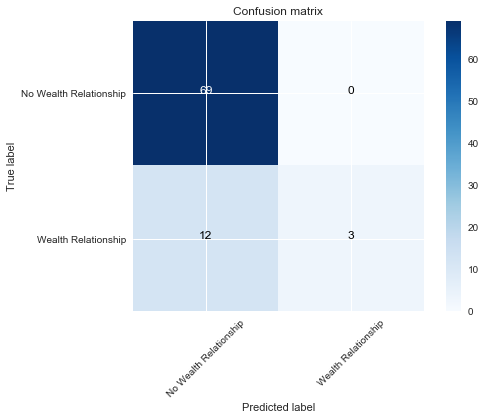

In [82]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["No Wealth Relationship", "Wealth Relationship"],
                      title='Confusion matrix')

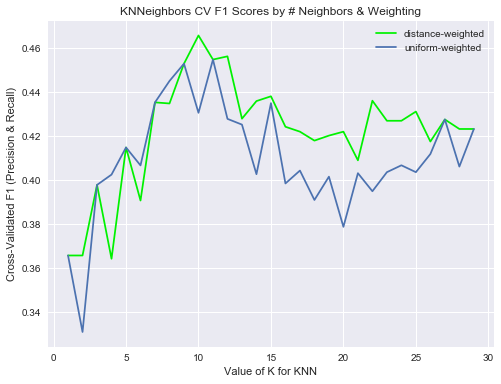

In [83]:
# plot the results showing cross-validated F1 by weighting metric and number of neighbors
plt.plot(k_range, list(grid_knn.cv_results_['mean_test_score'][0::2]), label="distance-weighted",color=lighten_color('g', 0.7))
plt.plot(k_range, list(grid_knn.cv_results_['mean_test_score'][1::2]), label="uniform-weighted")
plt.title("KNNeighbors CV F1 Scores by # Neighbors & Weighting")
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated F1 (Precision & Recall)')
plt.legend()

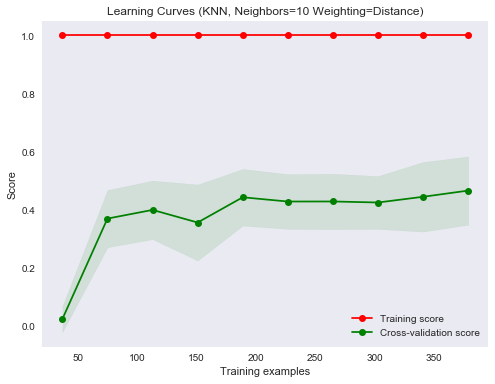

In [178]:
#plot the learning curve for optimal KNN model
title = "Learning Curves (KNN, Neighbors=10 Weighting=Distance)"
plot_learning_curve(best_knn, title, X_train_scale, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, n_jobs=-1)
plt.show()

**Phase 7 - Neural Networks**

---



In [98]:
#Neural Network------------------------------------------------------
from sklearn.neural_network import MLPClassifier

#create gridSearch parameters
parameters = {'solver': ['lbfgs'], 'max_iter': [10,25,50,100,175,250], 'alpha': [4], 'hidden_layer_sizes':[10,25,40,100]}

#run GridSearch to optimize parameters
clf = GridSearchCV(MLPClassifier(random_state=SEED), param_grid=parameters, scoring='f1', cv=5, n_jobs=-1, verbose=3)
clf.fit(X_train_scale,y_train)

#extract the best params from 'clf'
best_hyperparams = clf.best_params_
print(best_hyperparams)

#extract best CV score 
best_CV_score = clf.best_score_
print(best_CV_score)

#extract best model from clf
best_nn = clf.best_estimator_

#Fit the model to the data
best = best_nn.fit(X_train_scale,y_train)

#make predictions on test data
y_pred = best.predict(X_test_scale)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 out of 120 | elapsed:    2.1s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    5.9s finished
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'alpha': 4, 'hidden_layer_sizes': 40, 'max_iter': 175, 'solver': 'lbfgs'}
0.5003419660261766


In [99]:
#create confusion & classification matrix for test data
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred,digits=3))

[[66  3]
 [ 7  8]]
              precision    recall  f1-score   support

           0      0.904     0.957     0.930        69
           1      0.727     0.533     0.615        15

   micro avg      0.881     0.881     0.881        84
   macro avg      0.816     0.745     0.772        84
weighted avg      0.873     0.881     0.873        84



Confusion matrix, without normalization
[[66  3]
 [ 7  8]]


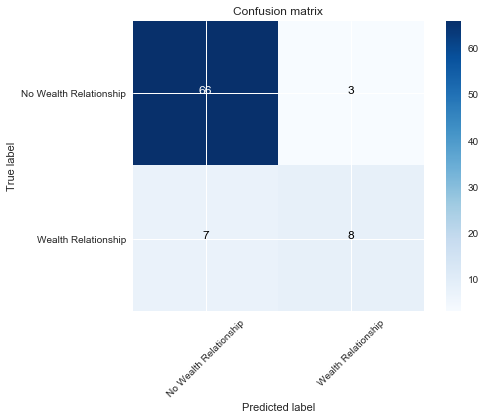

In [100]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["No Wealth Relationship", "Wealth Relationship"],
                      title='Confusion matrix')

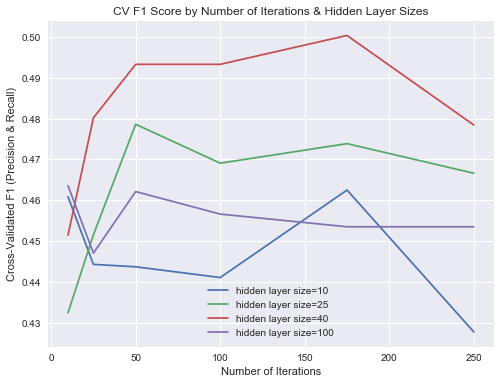

In [101]:
# plot the results showing cross-validated F1 scores by hidden layer sizes and number of model iterations
xp = [10,25,50,100,175,250]
plt.plot(xp, list(clf.cv_results_['mean_test_score'][:6]), label="hidden layer size=10")
plt.plot(xp, list(clf.cv_results_['mean_test_score'][6:12]), label="hidden layer size=25")
plt.plot(xp, list(clf.cv_results_['mean_test_score'][12:18]), label="hidden layer size=40")
plt.plot(xp, list(clf.cv_results_['mean_test_score'][18:]), label="hidden layer size=100")
plt.title('CV F1 Score by Number of Iterations & Hidden Layer Sizes')
plt.xlabel('Number of Iterations')
plt.ylabel('Cross-Validated F1 (Precision & Recall)')
plt.legend()

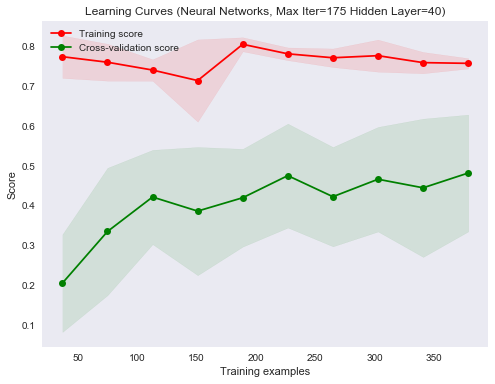

In [102]:
#plot the learning curve for Neural Network
title = "Learning Curves (Neural Networks, Max Iter=175 Hidden Layer=40)"
plot_learning_curve(best_nn, title, X_train_scale, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, n_jobs=-1)
plt.show()

**Phase 8 - Support Vector Machines - Linear SVC**

---



In [149]:
#Support Vector Machines (linearSVC) --------------------------------------------------------------------------
from sklearn import svm

#set parameter grid
weights = np.linspace(0.05,0.4, 10)
Cs = np.linspace(0.0001,0.1, 100)
classes = [{0: x, 1: 1.0-x} for x in weights]
param_grid = {'C' : Cs, 'class_weight' : classes}

#create and run grid search
support = GridSearchCV(svm.LinearSVC(dual=False), param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=3)
support.fit(X_train_scale, y_train)

#extract the best params from 'support'
best_hyperparams = support.best_params_
print(best_hyperparams)

#extract best CV score 
best_CV_score = support.best_score_
print(best_CV_score)

#extract best model from support
best_lsvc = support.best_estimator_

#Fit the model to the data
best = best_lsvc.fit(X_train_scale,y_train)

#make predictions on test data
predictions = best.predict(X_test_scale)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 3368 tasks      | elapsed:    6.0s


{'C': 0.05459090909090909, 'class_weight': {0: 0.32222222222222224, 1: 0.6777777777777778}}
0.5024604983218784


[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:    8.7s finished
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [150]:
#create confusion & classification matrix for test data
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions,digits=3))

[[64  5]
 [ 5 10]]
              precision    recall  f1-score   support

           0      0.928     0.928     0.928        69
           1      0.667     0.667     0.667        15

   micro avg      0.881     0.881     0.881        84
   macro avg      0.797     0.797     0.797        84
weighted avg      0.881     0.881     0.881        84



Confusion matrix, without normalization
[[64  5]
 [ 5 10]]


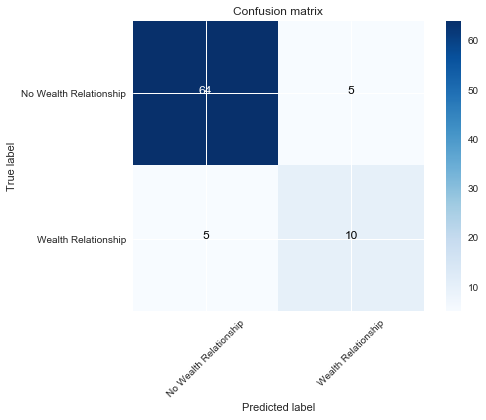

In [151]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["No Wealth Relationship", "Wealth Relationship"],
                      title='Confusion matrix')

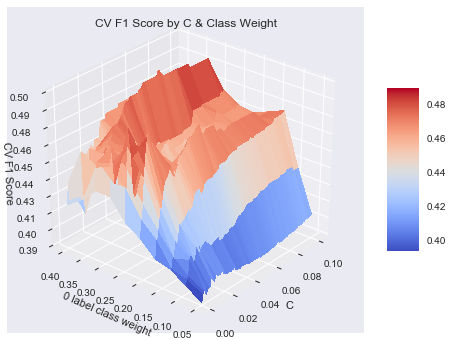

In [163]:
'''
======================
3D surface (color map)
======================

Demonstrates plotting a 3D surface colored with the coolwarm color map.
The surface is made opaque by using antialiased=False.

Also demonstrates using the LinearLocator and custom formatting for the
z axis tick labels.
from: https://matplotlib.org/examples/mplot3d/surface3d_demo.html
and https://stackoverflow.com/questions/9170838/surface-plots-in-matplotlib/30539444#30539444
'''

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.interpolate import griddata

# Make data.
Z = support.cv_results_['mean_test_score']
X = np.ma.getdata(support.cv_results_['param_C'])
Y = np.array([x[0] for x in [[v for k,v in d.items() if k==0] for d in np.ma.getdata(support.cv_results_['param_class_weight'])]])

# re-create the 2D-arrays
x1 = np.linspace(X.min(), X.max(), len(np.unique(X)))
y1 = np.linspace(Y.min(), Y.max(), len(np.unique(Y)))
x2, y2 = np.meshgrid(x1, y1)
z2 = griddata((X, Y), Z, (x2, y2), method='cubic')

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_zlabel('CV F1 Score')

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('CV F1 Score by C & Class Weight')
plt.xlabel('C')
plt.ylabel('0 label class weight')
ax.view_init(azim=220)

plt.show()

In [166]:
#display the best features of the linearsvc
best.coef_
both = zip(list(best.coef_[0]),df.iloc[:,2:].columns)
ndf = pd.DataFrame(list(both), columns=['Coefficient', 'Feature'])
ndf.sort_values('Coefficient',ascending=False,inplace=True)
ndf

,Coefficient,Feature
0,0.352127,P/G
16,0.110047,TopPlayer
12,0.094733,IPP
2,0.080629,Ht
3,0.079126,TeamStr
4,0.076278,TOI
18,0.067112,PPGRelativeToLead
14,-0.012386,TotalQOT
19,-0.029231,DraftYear
1,-0.032215,RelPM


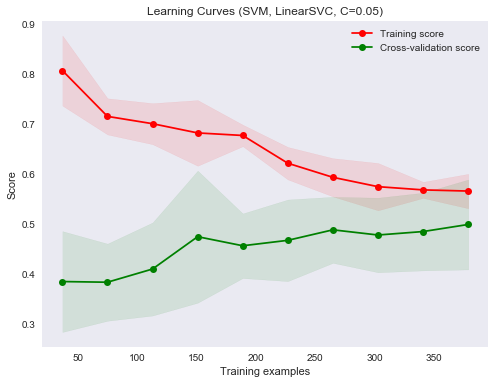

In [179]:
#plot the learning curve for LinearSVC
title = "Learning Curves (SVM, LinearSVC, C=0.05)"
plot_learning_curve(best_lsvc, title, X_train_scale, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, n_jobs=-1)
plt.show()

**Phase 9 - Support Vector Machines - NonLinear 'Sigmoid' Kernel SVC**

---



In [170]:
#Support Vector Machines (NonLinear)--------------------------------------------------------------------------
from sklearn import svm

#set parameter grid
weights = np.linspace(0.2, 0.2, 1)
Cs = np.linspace(1, 20, 20)
classes = [{0: x, 1: 1.0-x} for x in weights]
kernels = ['sigmoid']#, 'linear', 'sigmoid', 'rbf', ]
gammas = np.linspace(0.001, 0.1, 20)
param_grid = {'kernel' : kernels, 'class_weight' : classes, 'C': Cs, 'gamma':gammas}

#create and run grid search
support = GridSearchCV(svm.SVC(probability=True), param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=3)
support.fit(X_train_scale, y_train)

#extract the best params from 'support'
best_hyperparams = support.best_params_
print(best_hyperparams)

#extract best CV score 
best_CV_score = support.best_score_
print(best_CV_score)

#extract best model from support
best_nlsvc = support.best_estimator_

#Fit the model to the data
best = best_nlsvc.fit(X_train_scale,y_train)

#make predictions on test data
predictions = best.predict(X_test_scale)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 456 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 1096 tasks      | elapsed:   14.5s


{'C': 11.0, 'class_weight': {0: 0.2, 1: 0.8}, 'gamma': 0.01663157894736842, 'kernel': 'sigmoid'}
0.5301341589267285


[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   25.4s finished
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [171]:
#create confusion & classification matrix for test data
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions, digits=3))

[[57 12]
 [ 4 11]]
              precision    recall  f1-score   support

           0      0.934     0.826     0.877        69
           1      0.478     0.733     0.579        15

   micro avg      0.810     0.810     0.810        84
   macro avg      0.706     0.780     0.728        84
weighted avg      0.853     0.810     0.824        84



Confusion matrix, without normalization
[[57 12]
 [ 4 11]]


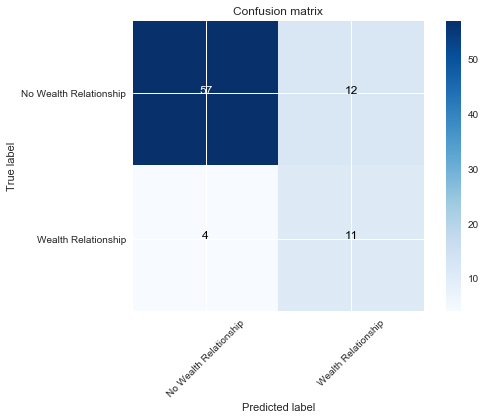

In [172]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["No Wealth Relationship", "Wealth Relationship"],
                      title='Confusion matrix')

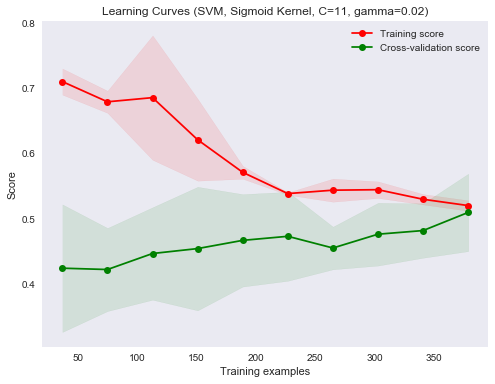

In [181]:
#plot the learning curve for NonLinearSVC
title = "Learning Curves (SVM, Sigmoid Kernel, C=11, gamma=0.02)"
plot_learning_curve(best_nlsvc, title, X_train_scale, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, n_jobs=-1)
plt.show()

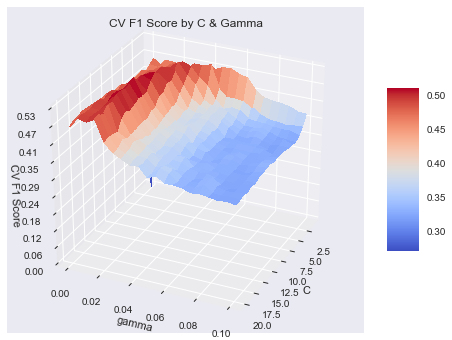

In [175]:
'''
======================
3D surface (color map)
======================

Demonstrates plotting a 3D surface colored with the coolwarm color map.
The surface is made opaque by using antialiased=False.

Also demonstrates using the LinearLocator and custom formatting for the
z axis tick labels.
from: https://matplotlib.org/examples/mplot3d/surface3d_demo.html
and https://stackoverflow.com/questions/9170838/surface-plots-in-matplotlib/30539444#30539444
'''

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.interpolate import griddata

# Make data.
Z = support.cv_results_['mean_test_score']
X = np.ma.getdata(support.cv_results_['param_C'])
Y = np.ma.getdata(support.cv_results_['param_gamma'])

# re-create the 2D-arrays
x1 = np.linspace(X.min(), X.max(), len(np.unique(X)))
y1 = np.linspace(Y.min(), Y.max(), len(np.unique(Y)))
x2, y2 = np.meshgrid(x1, y1)
z2 = griddata((X, Y), Z, (x2, y2), method='cubic')

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_zlabel('CV F1 Score')

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('CV F1 Score by C & Gamma')
plt.xlabel('C')
plt.ylabel('gamma')
ax.view_init(azim=25)

plt.show()

**Phase 10 - Logistic Regression**

---



In [13]:
#Logistic Regression --------------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression

#set parameter grid
weights = np.linspace(0.2, 0.55, 10)
solvers = ['liblinear']
Cs = np.linspace(0.1, 5, 20)
maxi = np.linspace(1, 20, 20)
classes = [{0: x, 1: 1.0-x} for x in weights]
param_grid = {'class_weight' : classes, 'solver' : solvers, 'C' : Cs, 'max_iter' : maxi}

#create and run grid search
support = GridSearchCV(LogisticRegression(), param_grid, scoring='f1', cv=5, n_jobs=-1)
support.fit(X_train_scale, y_train)

#extract the best params from 'support'
best_hyperparams = support.best_params_
print(best_hyperparams)

#extract best CV score 
best_CV_score = support.best_score_
print(best_CV_score)

#extract best model from support
best_lr = support.best_estimator_

#Fit the model to the data
best = best_lr.fit(X_train_scale,y_train)

#make predictions on test data
predictions = best.predict(X_test_scale)

{'C': 1.6473684210526318, 'class_weight': {0: 0.35555555555555557, 1: 0.6444444444444444}, 'max_iter': 3.0, 'solver': 'liblinear'}
0.49698727266938175


C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [14]:
#create confusion & classification matrix for test data
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions, digits=3))

[[64  5]
 [ 6  9]]
              precision    recall  f1-score   support

           0      0.914     0.928     0.921        69
           1      0.643     0.600     0.621        15

   micro avg      0.869     0.869     0.869        84
   macro avg      0.779     0.764     0.771        84
weighted avg      0.866     0.869     0.867        84



In [16]:
#display the best features of the logistic regression
best.coef_
both = zip(list(best.coef_[0]),X.columns)
ndf = pd.DataFrame(list(both), columns=['Coefficient', 'Feature'])
ndf.sort_values('Coefficient',ascending=False,inplace=True)
ndf

,Coefficient,Feature
0,1.124429,P/G
12,0.312927,IPP
4,0.289945,TOI
16,0.260897,TopPlayer
2,0.251120,Ht
3,0.225837,TeamStr
18,0.100031,PPGRelativeToLead
14,-0.062454,TotalQOT
1,-0.063471,RelPM
19,-0.095225,DraftYear


**Phase 11 - Ensemble 'Hard' Voting Using All Models**

---



In [114]:
#Voting Ensemble --------------------------------------------------------------------------
from sklearn.ensemble import VotingClassifier

#set parameter grid
weight = [[0.09272416486503077, 0.44187650916804544, 0.02071632996261758, 0.05945771936314645, 0.22758493754754378, 0.14427897836468206, 0.013361360728933928]]
for i in range(20):
  weight.append(np.random.dirichlet(np.ones(7),size=1)[0].tolist())
voters = ['hard']
param_grid = {'weights' : weight, 'voting' : voters}
print(weight)


#create and run grid search
overall = GridSearchCV(VotingClassifier(estimators=[('ada', best_ada), ('xg', best_xg), ('knn', best_knn), ('nn', best_nn), ('lsvc', best_lsvc), ('nlsvc', best_nlsvc), ('lr', best_lr)]), param_grid, scoring='f1', cv=5, n_jobs=-1,verbose=3)
overall.fit(X_train_scale, y_train)

#extract the best params from 'overall'
best_hyperparams = overall.best_params_
print(best_hyperparams)

#extract best CV score 
best_CV_score = overall.best_score_
print(best_CV_score)

#extract best model from overall
best_overall = overall.best_estimator_

#Fit the model to the data
best = best_overall.fit(X_train_scale,y_train)

#make predictions on test data
predictions = best.predict(X_test_scale)

[[0.09272416486503077, 0.44187650916804544, 0.02071632996261758, 0.05945771936314645, 0.22758493754754378, 0.14427897836468206, 0.013361360728933928]]
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   41.4s remaining:  1.0min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'voting': 'hard', 'weights': [0.09272416486503077, 0.44187650916804544, 0.02071632996261758, 0.05945771936314645, 0.22758493754754378, 0.14427897836468206, 0.013361360728933928]}
0.7701453852636975


C:\Users\e4129\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [119]:
predprob = best.predict_proba(X_test_scale)

AttributeError: predict_proba is not available when voting='hard'

In [115]:
#create confusion & classification matrix for test data
print(confusion_matrix(y_test,predictions))
#predict1 = best.predict(X_train_scale)
#print(confusion_matrix(y_train,best.classes_))
print(classification_report(y_test,predictions, digits=3))

[[412 215]
 [ 97 443]]
              precision    recall  f1-score   support

           0      0.809     0.657     0.725       627
           1      0.673     0.820     0.740       540

   micro avg      0.733     0.733     0.733      1167
   macro avg      0.741     0.739     0.732      1167
weighted avg      0.746     0.733     0.732      1167



In [116]:
#Fit the model to the data
#best = best_overall.fit(X_train_all,y_train)

#make predictions on test data
predall = best.predict(X_train_all)

#create confusion & classification matrix for test data
print(confusion_matrix(y,predall))
print(classification_report(y,predall))

[[67399 36982]
 [ 1837  9832]]
              precision    recall  f1-score   support

           0       0.97      0.65      0.78    104381
           1       0.21      0.84      0.34     11669

   micro avg       0.67      0.67      0.67    116050
   macro avg       0.59      0.74      0.56    116050
weighted avg       0.90      0.67      0.73    116050



Confusion matrix, without normalization
[[67399 36982]
 [ 1837  9832]]


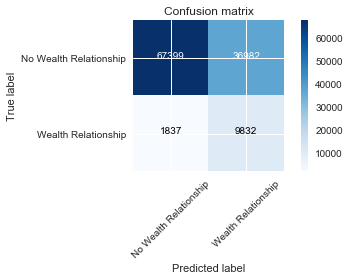

In [118]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y, predall)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["No Wealth Relationship", "Wealth Relationship"],
                      title='Confusion matrix')